#Kaggle 的 Binary Prediction with a Rainfall Dataset 挑战

In [ ]:
#source: https://www.kaggle.com/competitions/playground-series-s5e3/overview

In [1]:
!unzip playground-series-s5e3.zip && rm -rf playground-series-s5e3.zip

Archive:  playground-series-s5e3.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#数据EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [12]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [13]:
train.shape

(2190, 13)

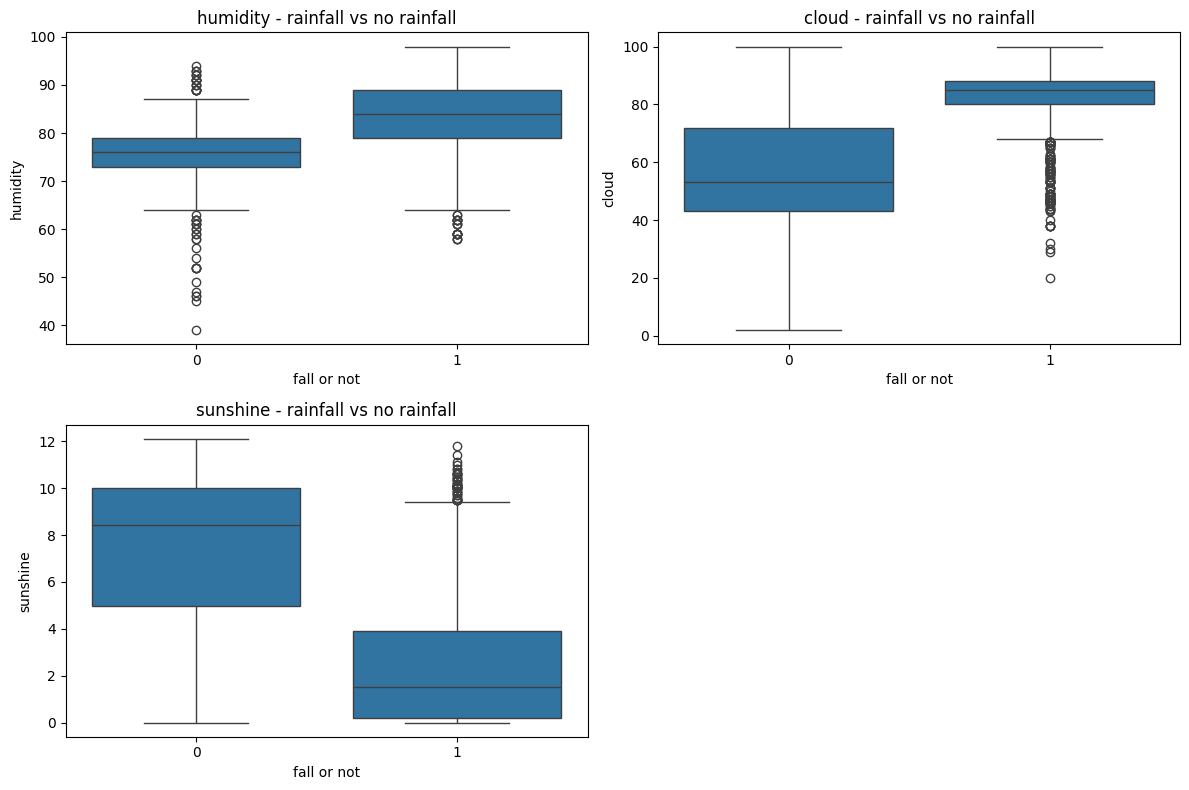

In [30]:
#画出箱线图看分布情况
# 目标列
target_col = 'rainfall'

# 选择气象特征
features = ['humidity', 'cloud', 'sunshine']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=train, x=target_col, y=feature)
    plt.title(f'{feature} - rainfall vs no rainfall')
    plt.xlabel('fall or not')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

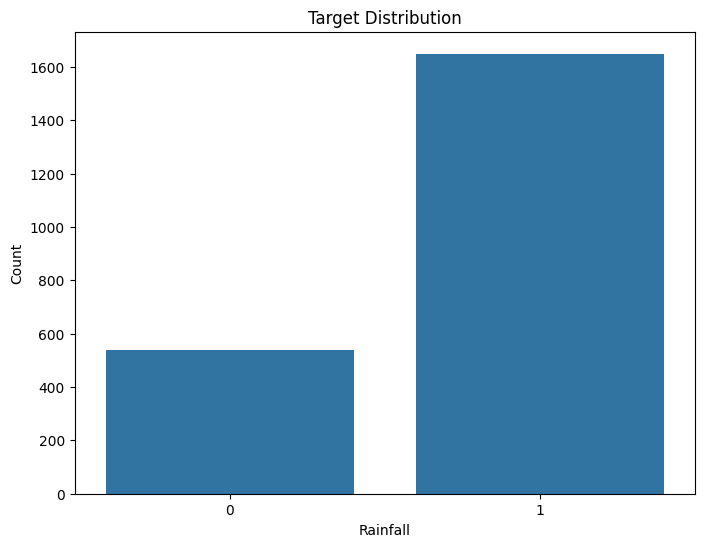

In [36]:
#数据类别平衡性分析
import matplotlib.pyplot as plt
import seaborn as sns

df1 = train.drop(['id'], axis=1).copy()
# 条形图
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='rainfall')  # target是目标列名
plt.title('Target Distribution')
plt.xlabel('Rainfall')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-31-3213560932.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), y='feature', x='importance', palette='viridis')


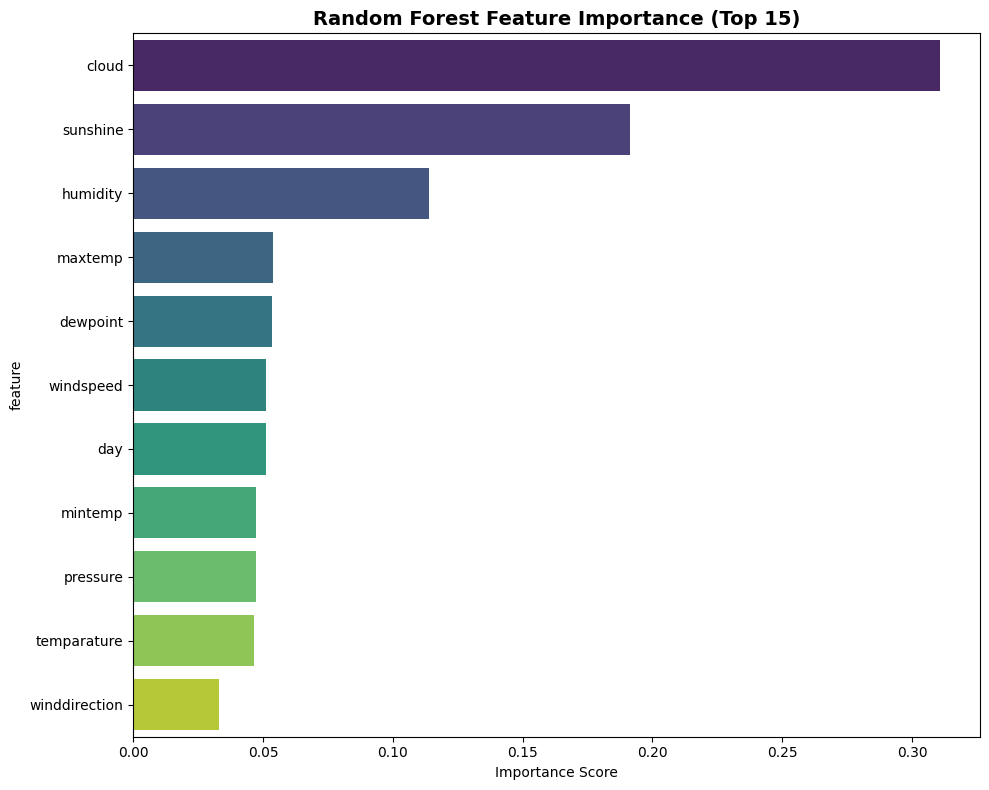

Feature Importance Ranking:
          feature  importance
7           cloud    0.310599
8        sunshine    0.191458
6        humidity    0.113916
2         maxtemp    0.053679
5        dewpoint    0.053421
10      windspeed    0.051208
0             day    0.051173
4         mintemp    0.047455
1        pressure    0.047421
3     temparature    0.046573
9   winddirection    0.033098

Top 5 features explain 0.723 of total importance
Top 10 features explain 0.967 of total importance


In [31]:
# 随机森林特征重要性分析
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = train.drop(['id'], axis=1).copy()
X_train = df.drop('rainfall', axis=1)
y_train = df['rainfall']

# 训练随机森林模型
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# 获取特征重要性
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# 可视化特征重要性（前15个）
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), y='feature', x='importance', palette='viridis')
plt.title('Random Forest Feature Importance (Top 15)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# 打印重要性排序
print("Feature Importance Ranking:")
print(feature_importance)

# 累积重要性分析
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()
print(f"\nTop 5 features explain {feature_importance.head(5)['cumulative_importance'].iloc[-1]:.3f} of total importance")
print(f"Top 10 features explain {feature_importance.head(10)['cumulative_importance'].iloc[-1]:.3f} of total importance")

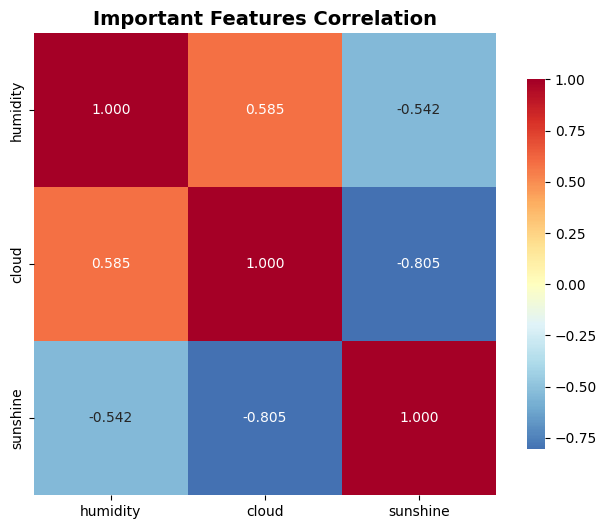

重要特征相关性:
          humidity     cloud  sunshine
humidity  1.000000  0.584854 -0.541592
cloud     0.584854  1.000000 -0.805128
sunshine -0.541592 -0.805128  1.000000


In [37]:
# 重要特征间的相关性分析（热力图）
important_features = ['humidity', 'cloud', 'sunshine']
important_corr = train[important_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(important_corr, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Important Features Correlation', fontsize=14, fontweight='bold')
plt.show()

print("重要特征相关性:")
print(important_corr)

In [ ]:
#eda信息总结
#任务为二分类，用天气信息预测是否下雨
#无缺失值，箱线图显示重要特征无明显异常
#数据量太少特征工程后会过拟合
#['humidity', 'cloud', 'sunshine']这三个特征分布情况不太一样，其他特征比较趋同,随机森林重要性分析显示这三个特征重要性占比最高
#平衡性分析轻微不平衡，不下雨和下雨的比例为1:3
#重要特征存在强相关性，数据多时考虑pca降维

#建模策略
#autogluon找模型堆叠组合以及超参数
#超小型数据量，表格结构非常适合TabPFN建模


In [20]:
#Autogluon找到堆叠模型和超参数
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split


df3 = train.drop(['id'], axis=1).copy()
test_id = test['id']
data_test = test.drop(['id'], axis=1).copy()
data_train, data_eval = train_test_split(df3, test_size=0.2, random_state=42)


predictor = TabularPredictor(label='rainfall',eval_metric='balanced_accuracy')
model = predictor.fit(
    train_data=data_train,

    # 堆叠配置（针对TabPFN优化）
    num_bag_folds=5,            # 适中的折数
    num_bag_sets=1,             # 小数据集用1个就够
    num_stack_levels=1,         # TabPFN作为base，1层堆叠足够

    # 多模型配置，以TabPFN为核心
    hyperparameters={
        # TabPFN - 核心模型
        'TABPFN': {
            'N_ensemble_configurations': 8  # 适中的ensemble
        },

        # 轻量级传统模型 - 作为互补
        'GBM': [
            {'num_boost_round': 100, 'learning_rate': 0.1, 'num_leaves': 31},
            {'num_boost_round': 200, 'learning_rate': 0.05, 'num_leaves': 15}
        ],
        'CAT': [
            {'iterations': 100, 'learning_rate': 0.1, 'depth': 6},
            {'iterations': 150, 'learning_rate': 0.05, 'depth': 8}
        ],
        'XGB': [
            {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6},
            {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 8}
        ],

        # 简单线性模型 - 提供不同视角
        'LR': [
            {'C': 1.0, 'penalty': 'l2'},
            {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
        ],

        # 基于距离的模型
        'KNN': [
            {'n_neighbors': 5, 'weights': 'distance'},
            {'n_neighbors': 10, 'weights': 'uniform'}
        ],

        # 随机森林 - 传统强baseline
        'RF': [
            {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5},
        ]
    },

    # 训练配置
    time_limit=1200,            # 20分钟
    presets='high_quality',     # 高质量但不是最激进
    holdout_frac=0.1,           # 保留足够验证集

    verbosity=2
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250621_024453"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          8
Memory Avail:       47.53 GB / 50.99 GB (93.2%)
Disk Space Avail:   192.93 GB / 235.68 GB (81.9%)
Presets specified: ['high_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~5x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is en

In [21]:
predict = model.predict(data_eval)
predict.head()

,rainfall
289,1
1692,1
1590,1
383,1
1818,1


In [22]:
model.evaluate(data_eval, silent=True)

{'balanced_accuracy': np.float64(0.7780090092463318),
 'accuracy': 0.8493150684931506,
 'mcc': np.float64(0.6001348198058234),
 'roc_auc': np.float64(0.8682331866916044),
 'f1': 0.9003021148036254,
 'precision': 0.8688046647230321,
 'recall': 0.9341692789968652}

In [24]:
model.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.825976,balanced_accuracy,0.019259,4.426683,0.001116,0.156044,2,False,12
1,CatBoost_BAG_L1,0.824522,balanced_accuracy,0.004320,1.515968,0.004320,1.515968,1,False,6
2,CatBoost_2_BAG_L1,0.822462,balanced_accuracy,0.004450,2.476040,0.004450,2.476040,1,False,7
3,LightGBM_BAG_L1,0.805483,balanced_accuracy,0.012094,2.746839,0.012094,2.746839,1,False,3
4,LinearModel_2_BAG_L1,0.804864,balanced_accuracy,0.028730,0.734895,0.028730,0.734895,1,False,11
5,LightGBM_2_BAG_L1,0.802732,balanced_accuracy,0.013824,2.754671,0.013824,2.754671,1,False,4
6,XGBoost_BAG_L1,0.799047,balanced_accuracy,0.016182,1.120418,0.016182,1.120418,1,False,8
7,XGBoost_2_BAG_L1,0.794357,balanced_accuracy,0.027051,1.299239,0.027051,1.299239,1,False,9
8,LinearModel_BAG_L1,0.794115,balanced_accuracy,0.027758,0.384429,0.027758,0.384429,1,False,10
9,RandomForest_BAG_L1,0.788916,balanced_accuracy,0.048047,0.298194,0.048047,0.298194,1,True,5


In [18]:
predict_test = model.predict(data_test)
predict_test.head()

,rainfall
0,1
1,1
2,1
3,0
4,0


In [19]:
from operator import sub
#提交
submission = pd.DataFrame({'id': test_id, 'rainfall': predict_test})
submission.to_csv('submission.csv', index=False)

#不同模型测试

In [25]:
#pfn适合处理数据量少的表格数据,但是效果一般
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tabpfn import TabPFNClassifier

df2 = train.copy()
X_train, X_eval, y_train, y_eval = train_test_split(df2.drop(['id', 'rainfall'], axis=1), df2['rainfall'], test_size=0.2, random_state=42)
test_id = test['id']
X_test = test.drop(['id'], axis=1)

# Initialize a classifier
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

# Predict probabilities
prediction_probabilities = clf.predict_proba(X_eval)
print("AUC", roc_auc_score(y_eval, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_eval)
print("Accuracy", accuracy_score(y_eval, predictions))

prediction_test = clf.predict(X_test)

#提交
submission = pd.DataFrame({'id': test_id, 'rainfall': prediction_test})
submission.to_csv('submission.csv', index=False)

/usr/local/lib/python3.11/dist-packages/tabpfn/base.py:89: UserWarning: Downloading model to /root/.cache/tabpfn/tabpfn-v2-classifier.ckpt.
  model, _, config_ = load_model_criterion_config(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tabpfn-v2-classifier.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

AUC 0.8707357551170939
Accuracy 0.8515981735159818


In [26]:
#尝试xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

df3 = train.copy()
X_train, X_eval, y_train, y_eval = train_test_split(df2.drop(['id', 'rainfall'], axis=1), df2['rainfall'], test_size=0.2, random_state=42)
test_id = test['id']
X_test = test.drop(['id'], axis=1)

# Initialize XGBoost classifier
clf = xgb.XGBClassifier(
   n_estimators=100,
   learning_rate=0.1,
   max_depth=6,
   min_child_weight=5,        # 防过拟合
   subsample=0.8,
   colsample_bytree=0.8,
   scale_pos_weight=3,        # 处理1:3的类别不平衡
   random_state=42,
   eval_metric='logloss'
)
clf.fit(X_train, y_train)

# Predict probabilities
prediction_probabilities = clf.predict_proba(X_eval)
print("AUC", roc_auc_score(y_eval, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_eval)
print("Accuracy", accuracy_score(y_eval, predictions))

prediction_test = clf.predict(X_test)

# 提交
submission = pd.DataFrame({'id': test_id, 'rainfall': prediction_test})
submission.to_csv('submission_xgb.csv', index=False)

AUC 0.8525065198493189
Accuracy 0.8401826484018264


#尝试针对特定模型做针对性数据增强

In [35]:
#竞赛描述数据是由一个rainfall数据集生成而来，合并原始数据集提高数据量
orig = pd.read_csv('Rainfall.csv')
train = pd.read_csv('train.csv').drop(['id'], axis=1)
print(orig.shape, train.shape)
print("\n原始数据列名:", orig.columns.tolist())
print("训练数据列名:", train.columns.tolist())

(366, 12) (2190, 12)

原始数据列名: ['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection', 'windspeed']
训练数据列名: ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall']


In [37]:
orig.columns = orig.columns.str.strip()
print("清理后原始数据列名:", orig.columns.tolist())

# 确保两个数据集的列顺序一致
train_columns = train.columns.tolist()
orig_reordered = orig[train_columns]  # 按训练数据的列顺序重新排列

print("重新排列后原始数据列名:", orig_reordered.columns.tolist())
print("训练数据列名:", train.columns.tolist())

清理后原始数据列名: ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed']
重新排列后原始数据列名: ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall']
训练数据列名: ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'rainfall']


In [49]:
train_enhanced = pd.concat([train, orig_reordered], axis=0, ignore_index=True)
mapping = {'yes': 1, 'no': 0, 1: 1, 0: 0}
train_enhanced['rainfall'] = train_enhanced['rainfall'].map(mapping)#合并后rainfall二进制编码
print("\n增强后训练数据形状:", train_enhanced.shape)


增强后训练数据形状: (2556, 12)


In [ ]:
#用增强后的数据尝试两个模型

In [48]:
#再次尝试tabpfn
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tabpfn import TabPFNClassifier

df5 = train_enhanced.copy()
X_train, X_eval, y_train, y_eval = train_test_split(df5.drop(['rainfall'], axis=1), df5['rainfall'], test_size=0.2, random_state=42)
test_id = test['id']
X_test = test.drop(['id'], axis=1)

# Initialize a classifier
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

# Predict probabilities
prediction_probabilities = clf.predict_proba(X_eval)
print("AUC", roc_auc_score(y_eval, prediction_probabilities[:, 1]))

# Predict labels
predictions = clf.predict(X_eval)
print("Accuracy", accuracy_score(y_eval, predictions))

prediction_test = clf.predict(X_test)

#提交
submission = pd.DataFrame({'id': test_id, 'rainfall': prediction_test})
submission.to_csv('submission.csv', index=False)

AUC 0.8612442202606139
Accuracy 0.8515625


In [57]:
# TabPFN with Group K Fold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GroupKFold
from tabpfn import TabPFNClassifier
import numpy as np
import pandas as pd

# 准备数据
df = train_enhanced.copy()
X = df.drop(['rainfall'], axis=1)
y = df['rainfall']

# 创建分组
train_with_id = pd.read_csv('train.csv')
groups = (train_with_id['id'] // 365).tolist()  # 训练数据分组
groups += [max(groups) + 1] * (len(df) - len(train_with_id))  # 原始数据分组

# TabPFN参数
clf = TabPFNClassifier()

# Group K Fold交叉验证
gkf = GroupKFold(n_splits=6)
cv_scores = []

for fold, (train_idx, val_idx) in enumerate(gkf.split(X, y, groups)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    clf.fit(X_train, y_train)
    pred_proba = clf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, pred_proba)
    cv_scores.append(auc)

    print(f"Fold {fold+1} AUC: {auc:.4f}")

print(f"\nCV AUC: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# 训练最终模型并预测
clf.fit(X, y)
prediction_test = clf.predict(test.drop(['id'], axis=1))

# 提交
submission = pd.DataFrame({'id': test['id'], 'rainfall': prediction_test})
submission.to_csv('submission_tabpfn.csv', index=False)
print("TabPFN提交文件已保存")

Fold 1 AUC: 0.8862
Fold 2 AUC: 0.8745
Fold 3 AUC: 0.8855
Fold 4 AUC: 0.9044
Fold 5 AUC: 0.9211
Fold 6 AUC: 0.9128

CV AUC: 0.8974 ± 0.0165
TabPFN提交文件已保存


#提交版本

In [12]:
# 多次调参后获得最终版本
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

# 1. 数据准备
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
orig = pd.read_csv('Rainfall.csv')

# 数据增强：合并原始数据
orig.columns = orig.columns.str.strip()
train_clean = train.drop(['id'], axis=1)
orig_reordered = orig[train_clean.columns]
train_enhanced = pd.concat([train_clean, orig_reordered], axis=0, ignore_index=True)

# 统一编码
train_enhanced['rainfall'] = train_enhanced['rainfall'].map({'yes': 1, 'no': 0, 1: 1, 0: 0})

# 2. 特征和标签
X = train_enhanced.drop(['rainfall'], axis=1)
y = train_enhanced['rainfall']

# 3. 分组
train_with_id = pd.read_csv('train.csv')
groups = (train_with_id['id'] // 365).tolist() + [6] * len(orig)

# 4. 模型训练
clf = XGBClassifier(max_depth=3, colsample_bytree=0.9, subsample=0.9,
                   n_estimators=200, learning_rate=0.1, random_state=42)

#手动实现6折交叉验证
gkf = GroupKFold(n_splits=6)
cv_scores = []

for fold, (train_idx, val_idx) in enumerate(gkf.split(X, y, groups)):
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    pred_proba = clf.predict_proba(X.iloc[val_idx])[:, 1]
    auc = roc_auc_score(y.iloc[val_idx], pred_proba)
    cv_scores.append(auc)
    print(f"Fold {fold+1}: {auc:.4f}")

print(f"CV AUC: {np.mean(cv_scores):.4f}")

# 5. 最终预测
clf.fit(X, y)
pred = clf.predict_proba(test.drop(['id'], axis=1))[:, 1]

# 6. 提交
pd.DataFrame({'id': test['id'], 'rainfall': pred}).to_csv('submission_xgboost.csv', index=False)
print("提交文件已保存")

Fold 1: 0.8939
Fold 2: 0.8565
Fold 3: 0.8834
Fold 4: 0.8920
Fold 5: 0.9148
Fold 6: 0.9071
CV AUC: 0.8913
提交文件已保存


In [11]:
# 再次尝试同样方法训练tabpfn
from sklearn.model_selection import GroupKFold
from sklearn.metrics import roc_auc_score
from tabpfn import TabPFNClassifier
import numpy as np
import pandas as pd


# 1. 数据准备
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
orig = pd.read_csv('Rainfall.csv')

# 数据增强：合并原始数据
orig.columns = orig.columns.str.strip()
train_clean = train.drop(['id'], axis=1)
orig_reordered = orig[train_clean.columns]
train_enhanced = pd.concat([train_clean, orig_reordered], axis=0, ignore_index=True)
mapping = {'yes': 1, 'no': 0, 1: 1, 0: 0}
train_enhanced['rainfall'] = train_enhanced['rainfall'].map(mapping)#合并后rainfall二进制编码

# 数据准备
X = train_enhanced.drop(['rainfall'], axis=1)
y = train_enhanced['rainfall']

# 分组
train_with_id = pd.read_csv('train.csv')
groups = (train_with_id['id'] // 365).tolist() + [6] * (len(X) - len(train_with_id))

# TabPFN交叉验证
clf = TabPFNClassifier()
gkf = GroupKFold(n_splits=6)
cv_scores = []

for fold, (train_idx, val_idx) in enumerate(gkf.split(X, y, groups)):
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    pred_proba = clf.predict_proba(X.iloc[val_idx])[:, 1]
    auc = roc_auc_score(y.iloc[val_idx], pred_proba)
    cv_scores.append(auc)
    print(f"Fold {fold+1}: {auc:.4f}")

print(f"TabPFN CV AUC: {np.mean(cv_scores):.4f}")

# 最终预测
clf.fit(X, y)
pred = clf.predict_proba(test.drop(['id'], axis=1))[:, 1]

# 提交
pd.DataFrame({'id': test['id'], 'rainfall': pred}).to_csv('submission_tabpfn.csv', index=False)
print("TabPFN提交文件已保存")

Fold 1: 0.8862
Fold 2: 0.8745
Fold 3: 0.8855
Fold 4: 0.9044
Fold 5: 0.9211
Fold 6: 0.9128
TabPFN CV AUC: 0.8974
TabPFN提交文件已保存


In [14]:
# 等权重平均融合
import pandas as pd

xgb_sub = pd.read_csv('submission_xgboost.csv')
tab_sub = pd.read_csv('submission_tabpfn.csv')

# 等权重平均融合
ensemble_pred = 0.5 * xgb_sub['rainfall'] + 0.5 * tab_sub['rainfall']

# 生成融合提交文件
submission = pd.DataFrame({
    'id': xgb_sub['id'],
    'rainfall': ensemble_pred
})

submission.to_csv('submission_ensemble.csv', index=False)
print("融合提交文件已保存: submission_ensemble.csv")

融合提交文件已保存: submission_ensemble.csv


In [ ]:
#总结，模型建模用了xgboost+tabfpn做等权平均融合
#其中利用原数据集做特征+6折交叉验证大幅度提升了cv值